## Mapping Coral Bleaching

__Research question: Is there a correlation between anthropogenic factors/threats (e.g. air pollution, deforestation) and coral bleaching?__

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# for plotting
import matplotlib.pyplot as plt
import numpy as np

### Import coral bleaching file

In [2]:
coral = gpd.read_file('CoralBleaching.csv')
pd.options.display.max_columns = None
coral.head()

ID REGION SUBREGION COUNTRY               LOCATION     LAT    LON MONTH  \
0  7067                   France     Hermitage, Reunion  -21.22  55.22     4   
1  7068                   France  Saint Gilles, Reunion  -21.05  55.23     7   
2  7069                   France     Saint-Leu, Reunion  -21.16  55.28     2   
3  4024                   France              SE France      43      5     8   
4  7049                    Macau   Koh Tao, Surat Thani   10.12  99.81     7   

   YEAR DEPTH SEVERITY_CODE BLEACHING_SEVERITY CORAL_FAMILY  \
0  2008     6             0       No Bleaching                
1  2008   6.5             0       No Bleaching                
2  2008     6             0       No Bleaching                
3  1999                  -1   Severity Unknown                
4  2009     4             0       No Bleaching                

                                CORAL_SPECIES PERCENTAGE_AFFECTED  \
0                                                                   
1                                                                   
2                                                                   
3  Cladocora caespitosa, Oculina patagonensis                       
4                                                                   

  BLEACHING_DURATION MORTALITY_CODE MORTALITY RECOVERY_CODE RECOVERY  \
0                                                                      
1                                                                      
2                                                                      
3                                                                      
4                                                                      

           SURVEY_TYPE SURVEY_AREA                       WATER_TEMPERATURE  \
0  Reef Check Protocol                                                       
1  Reef Check Protocol                                                       
2  Reef Check Protocol                                                       
3               Diving      100 km                              22-23.9 °C   
4  Reef Check Protocol              Air temp 28 Deg C, Water temp 29 Deg C   

  OTHER_FACTORS                                            REMARKS  \
0                0% of recorded Recently killed coral on substr...   
1                0% of recorded Recently killed coral on substr...   
2                0% of recorded Recently killed coral on substr...   
3                Bleaching of Cladocora caespitosa and Oculina ...   
4                0% of recorded recently killed coral on substr...   

                                              SOURCE REFERENCE_CODE  \
0  Reef Check, Submitted by Harold Cambert. Site ...                  
1  Reef Check, Submitted by Harold Cambert. Site ...                  
2  Reef Check, Submitted by Harold Cambert . Site...                  
3  Martin Pêcheux (martin-pecheux@wanadoo.fr) per...                  
4  Reef check submitted by Suchana Apple Chavanic...                  

  COUNTRY_CODE geometry  
0          FRA     None  
1          FRA     None  
2          FRA     None  
3          FRA     None  
4          MAC     None

In [3]:
list(coral)

['ID',
 'REGION',
 'SUBREGION',
 'COUNTRY',
 'LOCATION',
 'LAT',
 'LON',
 'MONTH',
 'YEAR',
 'DEPTH',
 'SEVERITY_CODE',
 'BLEACHING_SEVERITY',
 'CORAL_FAMILY',
 'CORAL_SPECIES',
 'PERCENTAGE_AFFECTED',
 'BLEACHING_DURATION',
 'MORTALITY_CODE',
 'MORTALITY',
 'RECOVERY_CODE',
 'RECOVERY',
 'SURVEY_TYPE',
 'SURVEY_AREA',
 'WATER_TEMPERATURE',
 'OTHER_FACTORS',
 'REMARKS',
 'SOURCE',
 'REFERENCE_CODE',
 'COUNTRY_CODE',
 'geometry']

### Trim `coral` to the columns desired

In [4]:
coral = coral[['COUNTRY',
 'LOCATION',
 'LAT',
 'LON',
 'MONTH',
 'YEAR',
 'BLEACHING_SEVERITY',
 'WATER_TEMPERATURE',
 'COUNTRY_CODE',
 'geometry']]

### Convert `YEAR` and `MONTH` in `coral` to type datetime

In [5]:
coral['LAT'] = pd.to_numeric(coral['LAT'])
coral['LON'] = pd.to_numeric(coral['LON'])
coral['DAY'] = 1
coral['MONTH'] = coral['MONTH'].replace('','1')

In [6]:
coral['DATE'] = pd.to_datetime(coral[['YEAR', 'MONTH', 'DAY']])

Because there is no day recorded in the dataset, I chose all days as 1. 

### Further investigate and visualize `coral`

In [7]:
import plotly.express as px

In [8]:
bleaching_status = coral.BLEACHING_SEVERITY.value_counts().reset_index()
bleaching_status

index  BLEACHING_SEVERITY
0      No Bleaching                1477
1               Low                1429
2  Severity Unknown                1201
3              HIGH                1172
4            Medium                 911

### Create a bar chart to show the distribution of corals in each bleaching category

In [9]:
px.bar(bleaching_status,
       x='index',
       y='BLEACHING_SEVERITY',
       color='index',
       title='Global Coral Bleaching Status from 1963 to 2012',
       labels={'BLEACHING_SEVERITY':'count','index':'Bleaching Severity'},
       category_orders={"index": ['Severity Unknown','No Bleaching','Low', 'Medium', 'HIGH']}
      )

From the graph, it seems that there is an overwhelmingly large high-bleaching-status coral, not to mention that there might be more in the `Severity Unknown` category.

### Create map based on the distribution of different bleaching status

In [10]:
fig_1 = px.scatter_mapbox(coral, 
                            lat="LAT", 
                            lon="LON", 
                            color="BLEACHING_SEVERITY",
                            zoom=0,
                            labels={'BLEACHING_SEVERITY':'Bleaching Severity'}
                           )
fig_1.update_layout(mapbox_style="carto-darkmatter")
fig_1.show()

In [11]:
bleaching_list = coral.BLEACHING_SEVERITY.unique().tolist()
bleaching_list

['No Bleaching', 'Severity Unknown', 'HIGH', 'Medium', 'Low']

The list needs to be reordered.

In [12]:
bleaching_list = [ 'Severity Unknown','No Bleaching','Low','Medium','HIGH']

In [13]:
from ipywidgets import interact
@interact
def scatter_map(bleaching=bleaching_list):
    
    fig_2 = px.scatter_mapbox(coral[coral.BLEACHING_SEVERITY == bleaching], 
                            lat="LAT", 
                            lon="LON", 
                            color="BLEACHING_SEVERITY",
                            zoom=0,
                            labels={'BLEACHING_SEVERITY':'Bleaching Severity'}
                           )

    fig_2.update_layout(mapbox_style="carto-darkmatter")

    fig_2.show()

interactive(children=(Dropdown(description='bleaching', options=('Severity Unknown', 'No Bleaching', 'Low', 'M…

By selecting the category `HIGH`, we can see where the severe coral bleaching occurs – a lot of them are concentrated around the Indian Ocean near South East Asia, East Africa and Oceania and in the Caribbean area. 

The two maps above are visually not very informative because the plots are scattered and there is not much pattern. However, they give an general visual idea about where most corals are located in the world. In fact, if we were to verbally describe the destribution of corals, the ones with a higher bleaching severity have a similar distribution to the ones with no bleaching. This means that we need to take a closer look at more than just the surrounding countries to determine what potentially has happened to the bleaching or dead corals, but first looking at the neighboring countries could be helpful.

### Import files about anthropogenic factors that might influence coral bleaching

In [14]:
pop = gpd.read_file('worldpop.geojson')

### Trim `pop`

In [15]:
columns_to_keep = [
 'COUNTRY',
 'iso3',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 'geometry']
pop = pop[columns_to_keep]

### Import files to be joined with `pop`

In [16]:
Plastic = gpd.read_file('plastic.csv') #this dataset contains the total plastic waste generation in each country in 2010
Air = gpd.read_file("air.csv") #this file contains death rate of each country caused by air pollution from 1990 to 2017.
Forest = gpd.read_file('forest.csv') #this file contains forest cover of each country from 1990 to 2020.

### Modify the imported files to maximum utility

In [17]:
plastic = Plastic.drop(columns=['geometry', 'Entity'])
plastic.columns = ['iso3', 'Percent_Mismanaged_Plastic']
plastic['Percent_Mismanaged_Plastic'] = pd.to_numeric(plastic.copy()['Percent_Mismanaged_Plastic'])

In [18]:
air = Air[Air['Year'] == '2010']
list(air)

['Entity', 'Code', 'Year', 'Annual CO2 emissions', 'geometry']

In [19]:
air.columns = ['COUNTRY',
 'iso3',
 'Year',
 'CO2',
 'geometry']

In [20]:
air = air[['iso3',
 'CO2']]

In [21]:
air['CO2'] = pd.to_numeric(air.copy()['CO2'])

#### Join 2020 `forest` data with `pop`

In [22]:
forest = Forest[Forest['Year'] == '2020']
forest = forest[['Code','Forest cover']]
forest.columns = ['iso3','cover']

In [23]:
forest = forest.dropna()

In [24]:
forest['cover'] = pd.to_numeric(forest.copy()['cover'])

In [25]:
joined = pd.merge(pop,forest,on=['iso3'])

In [26]:
joined['cover'] = joined['cover'].fillna(0)

### Create a more advanced map that maps coral bleaching with forest covers in each country

In [27]:
from keplergl import KeplerGl
map = KeplerGl(height=600,width=800)
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

### Save configuration manually and apply it to the map

In [28]:
config = {'version': 'v1',
 'config': {'visState': {'filters': [{'dataId': ['coral'],
     'id': 'a5idxw7ua',
     'name': ['BLEACHING_SEVERITY'],
     'type': 'multiSelect',
     'value': ['HIGH', 'Medium', 'Low', 'No Bleaching'],
     'enlarged': False,
     'plotType': 'histogram',
     'yAxis': None},
    {'dataId': ['coral'],
     'id': 'khl0sse4q',
     'name': ['DATE'],
     'type': 'timeRange',
     'value': [-220924800000, 1338508800000],
     'enlarged': True,
     'plotType': 'histogram',
     'yAxis': None}],
   'layers': [{'id': 'trajdp',
     'type': 'cluster',
     'config': {'dataId': 'coral',
      'label': 'Coral Bleaching',
      'color': [30, 150, 190],
      'columns': {'lat': 'LAT', 'lng': 'LON'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'clusterRadius': 40,
       'colorRange': {'name': 'Custom Palette',
        'type': 'custom',
        'category': 'Custom',
        'colors': ['#ce1256', '#d7b5d8', '#df65b0', '#f1eef6']},
       'radiusRange': [1, 40],
       'colorAggregation': 'mode'},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'BLEACHING_SEVERITY',
       'type': 'string'},
      'colorScale': 'ordinal'}},
    {'id': 'mzb5vm',
     'type': 'geojson',
     'config': {'dataId': 'Forest Cover',
      'label': 'Forest Cover',
      'color': [246, 209, 138],
      'columns': {'geojson': 'geometry'},
      'isVisible': True,
      'visConfig': {'opacity': 0.27,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': [183, 136, 94],
       'colorRange': {'name': 'ColorBrewer Greens-6',
        'type': 'singlehue',
        'category': 'ColorBrewer',
        'colors': ['#edf8e9',
         '#c7e9c0',
         '#a1d99b',
         '#74c476',
         '#31a354',
         '#006d2c']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'stroked': False,
       'filled': True,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'cover', 'type': 'real'},
      'colorScale': 'quantize',
      'sizeField': None,
      'sizeScale': 'linear',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'Forest Cover': [{'name': 'COUNTRY',
        'format': None},
       {'name': 'cover', 'format': None}],
      'coral': [{'name': 'COUNTRY', 'format': None},
       {'name': 'LOCATION', 'format': None},
       {'name': 'LAT', 'format': None},
       {'name': 'LON', 'format': None},
       {'name': 'MONTH', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': True},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': -15.869876165095315,
   'longitude': -13.281820496300504,
   'pitch': 0,
   'zoom': 0.6390883347455456,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

I apologize for the above chunk of codes! It seems to be the only way for me to save the map without converting it to an html.

In [29]:
map.add_data(data=joined,name='Forest Cover')
coral_df = pd.DataFrame(data=coral)
map.add_data(data=coral_df,name='coral')
map.config = config

By moving the timeline around, we can see that there is a large increase in coral data collection in the year 1998, the reason of which is unclear to me. By zooming into the map, we can see which countries' surroundings are seeing more severe coral bleaching. As the coral data points are narrowed to very specific locations, it is possible to look at some countries case studies to see if anything has happened in that country to increase coral bleaching.

### Further investigate the relationship between forest cover and coral bleaching

To understand the concentration of high bleaching, it would be useful to look at the change in forest covers in the countries nearby to see if there is a relation.

In [30]:
Forest['Year']=pd.to_numeric(Forest['Year'])

### Output all the regions without a code in `Forest`

In [31]:
x=[]
for i in range (len(Forest['Entity'])):
    if Forest['Code'][i] == '':
        x.append(Forest['Entity'][i])
pd.Series(x).unique()


array(['Africa', 'Americas', 'Asia', 'Bonaire, Sint Eustatius and Saba',
       'Caribbean', 'Central America', 'Central Asia', 'EU-27', 'EU-28',
       'Eastern Africa', 'Eastern Asia', 'Eastern Europe', 'England',
       'Europe', 'Faroe Islands', 'French Guyana',
       'Land Locked Developing Countries', 'Least Developed Countries',
       'Low Income Food Deficit Countries', 'Micronesia', 'Middle Africa',
       'Net Food Importing Developing Countries', 'Northern Africa',
       'Northern America', 'Northern Europe', 'Oceania', 'Scotland',
       'Sint Maarten (French part)', 'Small Island Developing States',
       'South America', 'Southeastern Asia', 'Southern Africa',
       'Southern Asia', 'Southern Europe', 'Wallis and Futuna Islands',
       'Western Africa', 'Western Asia', 'Western Europe'], dtype=object)

#### Create a function to select certain rows of data and convert them into one data frame

In [32]:
def convert(countries):
    c = []
    for i in countries:
        new = Forest[Forest['Entity']==i]
        new = new[new['Year'] >= 1990]
        c.append(new)
        
    return pd.concat(c)

In [33]:
impacted_areas = ['Caribbean','Southern Asia', 'Southeastern Asia', 'Oceania','Eastern Africa']

From the maps above, the areas where corals are the most impacted are summarized into the list `impacted_areas`. 

In [34]:
impacted = convert(impacted_areas)

In [35]:
fig = px.line(impacted, x="Year", y="Forest cover",color='Entity', title='Percent Forest cover from 1990 to 2020')
fig.show()

This graph shows that Southeast Asia and East Africa have seen a drastic decrease in forest cover, which corresponds to the increase in severe coral bleaching in these areas. However, the increase in forest cover in the Caribbeans counter the idea that there is a positive correlation between deforestation and coral bleaching.

#### Take a closer look into SE Asia and East Africa

In [36]:
SEA_Countries = [ 'Brunei', 'Myanmar', 'Cambodia', 'Timor', 'Indonesia', 'Laos', 'Malaysia','Philippines', 'Singapore', 'Thailand','Vietnam']
seAsia = convert(SEA_Countries)
#create a list of all the South East Asian countries and convert them into a single data frame.

In [37]:
fig = px.line(seAsia, x="Year", y="Forest cover",color='Entity', title='Percent Forest cover in in South East Asia from 1990 to 2020')
fig.show()

This line graph shows that the majority of countries in South East Asia have seen a decline in forest cover in the last few decades. Specifically, countries that have more abundant corals like Indonesia, the Philippines, and Malaysia are all experiencing deforestation.

In [38]:
East_Africa =  ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Réunion', 'Rwanda', 'Seychelles', 'Somalia', 'Somaliland', 'Tanzania', 'Uganda']
EA_countries = convert(East_Africa)
#create a list of all the East African countries and convert them into a single data frame.

In [39]:
fig = px.line(EA_countries, x="Year", y="Forest cover",color='Entity', title='Percent Forest cover in East Africa from 1990 to 2020')
fig.show()

Similar to the SE Asia graph, this East Africa graph shows the coastal countries such as Tanzania and Madagascar with a greater decline in forest cover. The waters of these countries are also where coral bleaching occurs more.

### Combine more datasets with `pop`

In [40]:
combined = pd.merge(pop,plastic,on=['iso3'])

In [41]:
combined = pd.merge(combined,air,on=['iso3'])

In [42]:
combined.sample()

COUNTRY iso3       1963       1964       1965       1966       1967  \
102  Croatia  HRV  4225675.0  4252876.0  4280923.0  4310701.0  4338683.0   

          1968       1969       1970       1971       1972       1973  \
102  4365628.0  4391490.0  4412252.0  4431275.0  4450564.0  4470161.0   

          1974       1975       1976       1977       1978       1979  \
102  4490660.0  4512082.0  4535934.0  4559571.0  4581085.0  4594778.0   

          1980       1981       1982       1983       1984       1985  \
102  4599782.0  4611509.0  4634234.0  4658254.0  4680285.0  4701417.0   

          1986       1987       1988       1989       1990       1991  \
102  4721446.0  4739745.0  4755207.0  4767260.0  4777368.0  4689022.0   

          1992       1993       1994       1995       1996       1997  \
102  4575818.0  4600463.0  4652024.0  4620030.0  4557097.0  4534920.0   

          1998       1999       2000       2001       2002       2003  \
102  4532135.0  4512597.0  4468302.0  4299642.0  4302174.0  4303399.0   

          2004       2005       2006       2007       2008       2009  \
102  4304600.0  4310145.0  4311159.0  4310217.0  4309705.0  4305181.0   

          2010       2011       2012  \
102  4295427.0  4280622.0  4267558.0   

                                              geometry  \
102  MULTIPOLYGON (((17.57853 42.94383, 17.51889 42...   

     Percent_Mismanaged_Plastic       CO2  
102                           9  21.05086

### Investigate more into the correlation coral bleaching and air and plastic pollution

#### Create a coordinate system of corals in 1998 (the year with the most data collection)

In [43]:
y1998 = coral[coral['YEAR']=='1998'].copy() #also choose 2010 data in this file to match with the rest of the dataset
h1998 = y1998[y1998['BLEACHING_SEVERITY']=='HIGH']
m1998 = y1998[y1998['BLEACHING_SEVERITY']=='Medium']
l1998 = y1998[y1998['BLEACHING_SEVERITY']=='Low']

In [44]:
la_h = h1998['LAT'].tolist() #latitude_high
lo_h = h1998['LON'].tolist()
la_m = m1998['LAT'].tolist()
lo_m = m1998['LON'].tolist()
la_l = h1998['LAT'].tolist()
lo_l = l1998['LON'].tolist()

In [45]:
from shapely.geometry import Point 

In [46]:
geometry_h = [Point(xy) for xy in zip(lo_h,la_h)]
high_bleaching_1998 = gpd.GeoDataFrame(geometry = geometry_h)
geometry_m = [Point(xy) for xy in zip(lo_m,la_m)]
medium_bleaching_1998 = gpd.GeoDataFrame(geometry = geometry_m)
geometry_l = [Point(xy) for xy in zip(lo_l,la_l)]
low_bleaching_1998 = gpd.GeoDataFrame(geometry = geometry_l)

#### Map the distribution of corals with air and plastic pollution

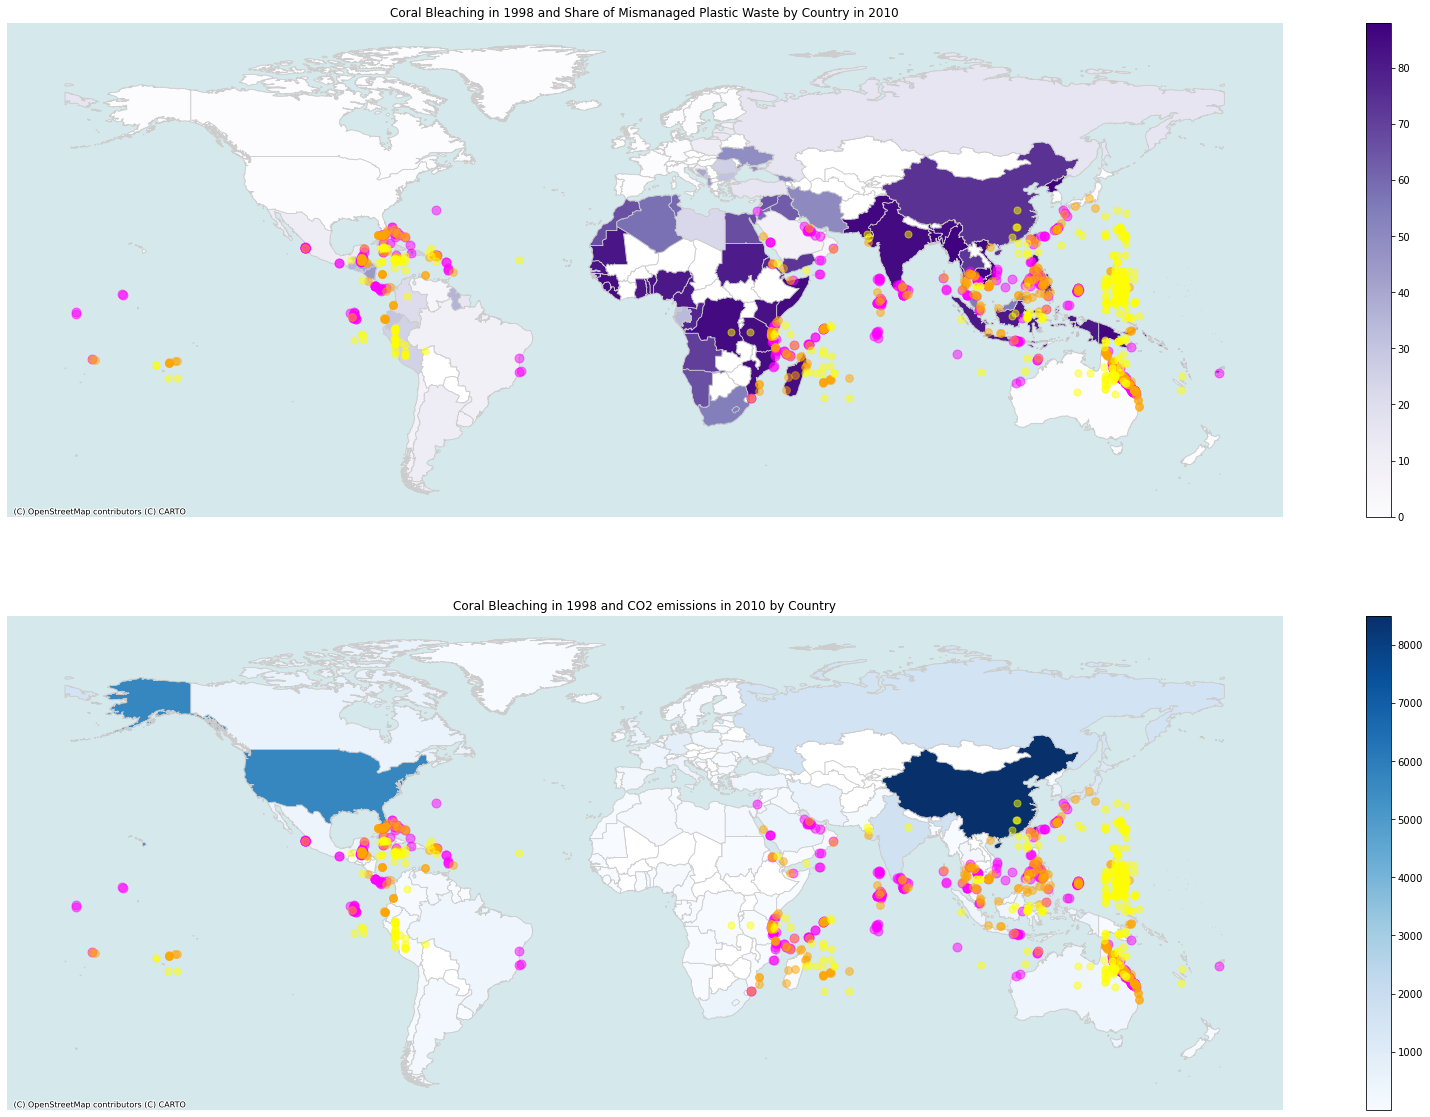

In [47]:
# use subplots to set up the canvas
combined = combined.to_crs('epsg:4326')
fig, axs = plt.subplots(2,1,figsize=(30,20))
ax1, ax2 = axs

#layer 1
pop.plot(ax=ax1,
         figsize=(30,20),
         color='white',
         linewidth=0.8,
         edgecolor='0.8')
#layer 2
combined.plot(ax=ax1,
            figsize=(30,20),
            cmap='Purples',
            column='Percent_Mismanaged_Plastic',
            linewidth=0.8,
            edgecolor='0.8',
            legend= True)
#layer 3
high_bleaching_1998.plot(ax=ax1, 
           marker="o",
           markersize=80, 
           alpha=0.5, 
           c="fuchsia")
medium_bleaching_1998.plot(ax=ax1, 
           marker="o",
           markersize=60, 
           alpha=0.5, 
           c="orange")
low_bleaching_1998.plot(ax=ax1, 
           marker="o",
           markersize=50, 
           alpha=0.5, 
           c="yellow")


# add a title
ax1.set_title('Coral Bleaching in 1998 and Share of Mismanaged Plastic Waste by Country in 2010')

# get rid of the axis
ax1.axis('off')
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Voyager)

#layer 1
pop.plot(ax=ax2,
         figsize=(30,20),
         color='white',
         linewidth=0.8,
         edgecolor='0.8')
#layer 2
combined.plot(ax=ax2,
            figsize=(30,20),
            cmap='Blues',
            column='CO2',
            linewidth=0.8,
            edgecolor='0.8',
            legend= True)
#layer 3
high_bleaching_1998.plot(ax=ax2, 
           marker="o",
           markersize=80, 
           alpha=0.5, 
           c="fuchsia")
medium_bleaching_1998.plot(ax=ax2, 
           marker="o",
           markersize=60, 
           alpha=0.5, 
           c="orange")
low_bleaching_1998.plot(ax=ax2, 
           marker="o",
           markersize=50, 
           alpha=0.5, 
           c="yellow")



# add a title
ax2.set_title('Coral Bleaching in 1998 and CO2 emissions in 2010 by Country')

# get rid of the axis
ax2.axis('off')
ctx.add_basemap(ax2,source=ctx.providers.CartoDB.Voyager)

The first map with the share of Mismanaged plastic waste shows a correlation between the environment of the surrounding countries and the corals' bleaching status. In the first map, the corals with severe bleaching are closer to the countries in deep purple, indicating that more than 70% of their plastic waste is not properly managed. 

The second map is less indicative, which is expected because CO2 first go into the air and the whole process of global warming requires CO2 being dissolved in water, which means a global more than local phenomenon.

At the same time, the above two maps also show that corals in and around the Caribbean sea are not really affected by the factors we have investigated so far. This means that more considerations need to be put into this area. Despite this, the link between plastic pollution and coral bleaching in SE Asia and East Africa seems pretty established.

My next step would be to find datasets on runoff and industrial water pollution. I will also look into other factors. In the next few week, I hope I can look at a specific country and see what is happening there in relation to its nearby corals!

This is my (Haiqi's) individual project, so I did all the work with some coding help from Yoh.